![](https://www.iris-cayeux.com/3770-large_default/the-flowers-are-blue-violet-and-the-plant-develops-abundant-bright-green-foliage-which-arches-down.jpg)

# 1. Import

In [1]:
# System
import os

# Numerical
import numpy as np
import pandas as pd

# NLP
import re

# Tools
import itertools

# Machine Learning - Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning - Model Selection
from sklearn.model_selection import GridSearchCV


# Machine Learning - Models
from sklearn import svm

# Machine Learning - Evaluation
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

print(os.listdir("../input"))

['Iris.csv', 'database.sqlite']


# 2. Functions

In [2]:
def get_plt_params():
    params = {'legend.fontsize': 'x-large',
              'figure.figsize' : (18, 8),
              'axes.labelsize' : 'x-large',
              'axes.titlesize' : 'x-large',
              'xtick.labelsize': 'x-large',
              'ytick.labelsize': 'x-large',
              'font.size'      :  10}
    return params

# 3. Read Data

In [3]:
df = pd.read_csv("../input/Iris.csv")
class_names = df.Species.unique()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


# 4. Visualization

## 4.1. Preprocess Data for Visualization

In [6]:
d = df
all_columns = d.columns
columns = list(set(all_columns) - set(["Id"]))
feature_columns = list(set(columns) - set(["Species"]))
target = "Species"

In [7]:
# scaler = StandardScaler()
# d = scaler.fit_transform(df) 
# d = pd.DataFrame(data=d, columns=df.columns)
# print(scaler.mean_)
# # scaler.transform(d)

## 4.2. Count Species in Dataset

Text(0,0.5,'Count')

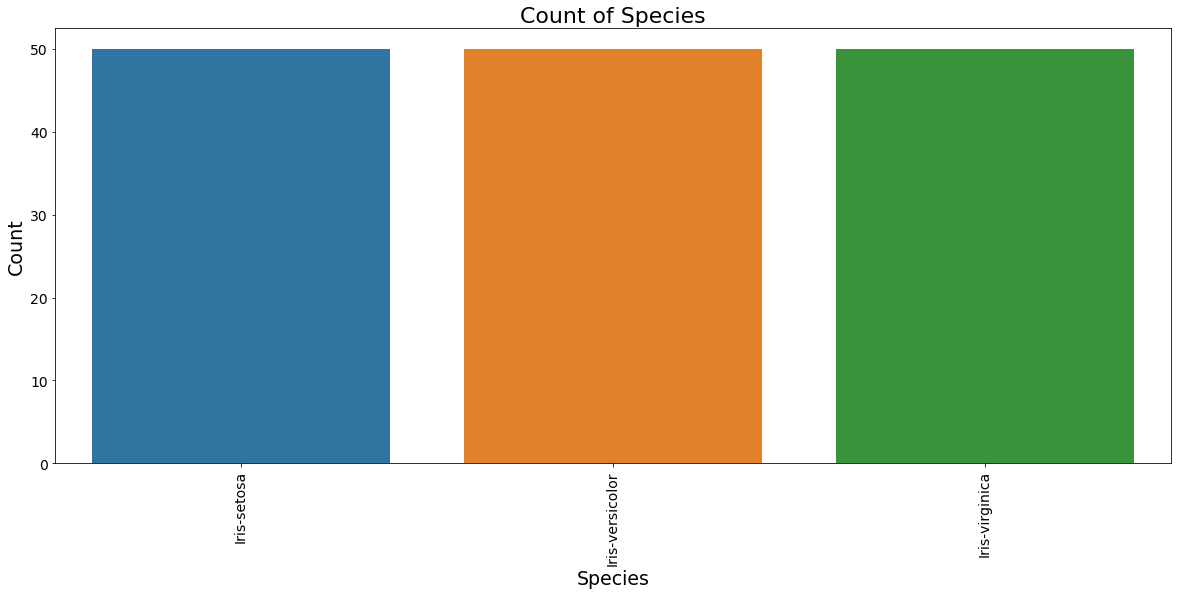

In [8]:
figsize=(20, 8)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col = target
xlabel = "Species"
ylabel = "Count"

sns.countplot(x=df[target])
plt.title("Count of Species")
plt.xticks(rotation=90)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

## 4.3. Linear Relationship Among Features

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


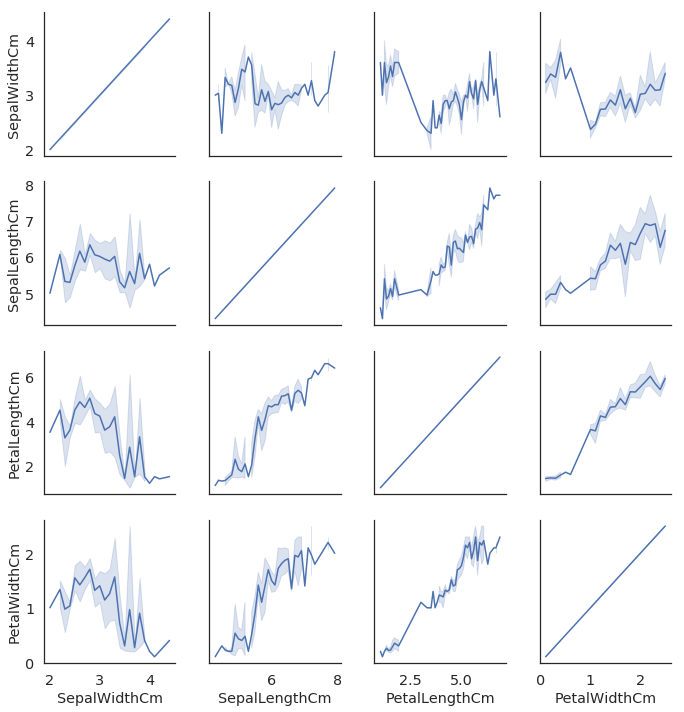

In [9]:
sns.set(style="white")

figsize=(20, 12)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

params = get_plt_params()
plt.rcParams.update(params)

# sns.pairplot(df[columns])

g = sns.PairGrid(df[columns])
g.map(sns.lineplot);


plt.plot()
plt.show()

In [10]:
# g = sns.PairGrid(
#     d, 
#     diag_sharey=True, 
#     height=2.5, 
#     aspect=1, 
#     despine=True, 
#     dropna=False)
# g = g.map(plt.scatter)
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter);

## 4.4. Cluster map for feature correleation and clustering
### Search for feature correlation and hierarchical relationship among features

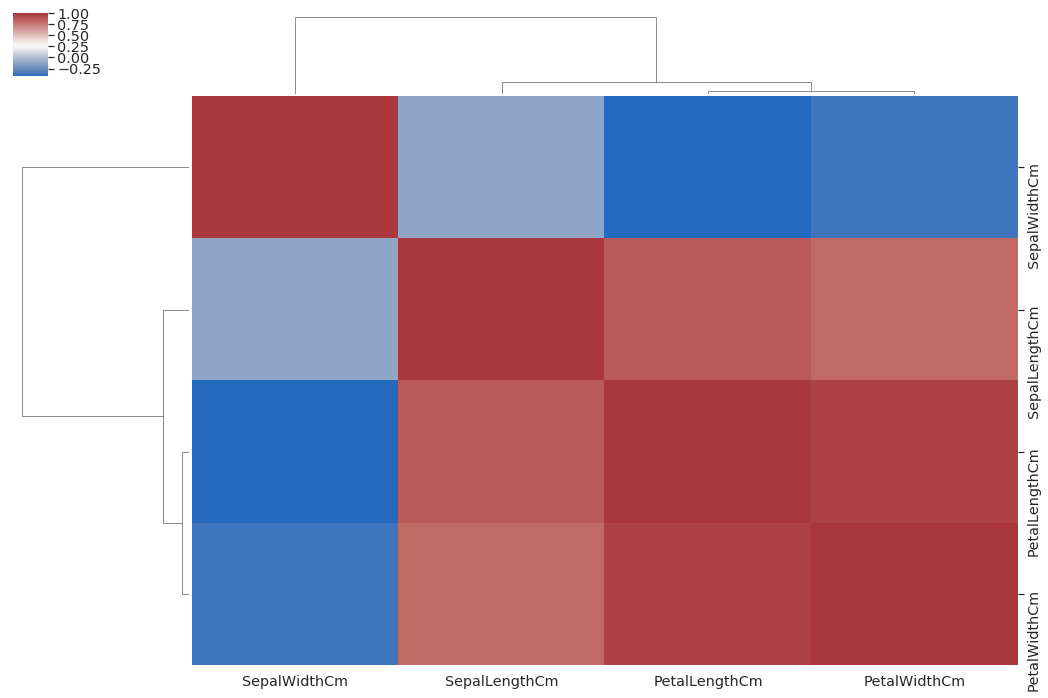

In [11]:
sns.set(style="white")

figsize=(20, 12)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

params = get_plt_params()
plt.rcParams.update(params)

d = df[columns]

sns.clustermap(d.corr(), 
               figsize=(18, 12),
#                center=0,
               cmap="vlag",
              )


plt.plot()
plt.show()


## 4.5. Correleation of Features using Heatmap 

<Figure size 1296x864 with 0 Axes>

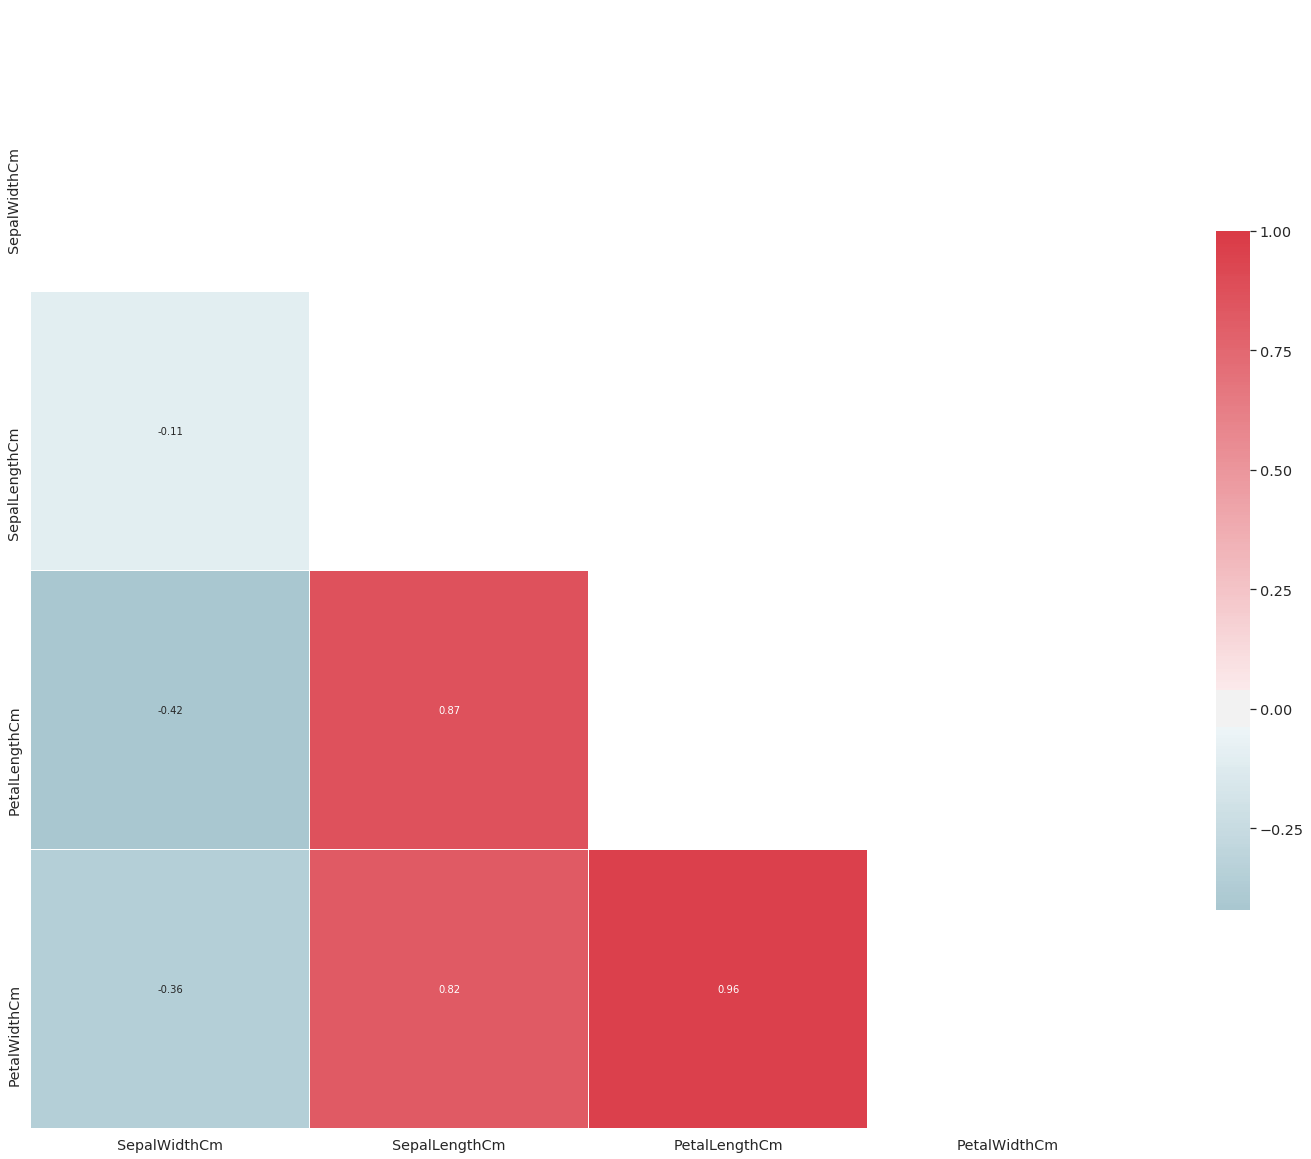

In [12]:
sns.set(style="white")
fig = plt.figure(figsize=(18, 12))

d = df[columns]

params = get_plt_params()
plt.rcParams.update(params)


corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(len(columns)*5, len(columns)*5))

cmap = sns.diverging_palette(h_neg=220, h_pos=10, s=75, l=50, sep=10, n=len(columns), center='light', as_cmap=True)

ax = sns.heatmap(
    corr,
    cmap=cmap,
    center=0,
    robust=True,
    annot=True,
    linewidths=0.5,
    linecolor='white',
    cbar=True,
    cbar_kws={"shrink": .5},
    square=True,
    mask=mask)

# plt.yticks(rotation=0)
# plt.xticks(rotation=90)

# 5. Preprocessing

In [13]:
target_val = set(df["Species"])
m = {i:v for v,i in enumerate(target_val)}
df["Species"] = df["Species"].map(m)

In [14]:
# df.dropna()
y = df["Species"]
X = df.drop(columns=["Id", "Species"])

X = X.values
y = y.values

# 6. Model Performance Evaluation Function

## 6.0. Classification Performance All Metrics (hidden)

In [15]:
def print_performance(model, X_test, y_test, class_names):
    preds = model.predict(X_test)

    # accuracy_score = metrics.accuracy_score(y_test, preds)
    # auc = metrics.auc(y_test, preds)
    # average_precision_score = metrics.average_precision_score(y_test, preds)
    # balanced_accuracy_score = metrics.balanced_accuracy_score(y_test, preds)
    # brier_score_loss = metrics.brier_score_loss(y_test, preds)
    classification_report = metrics.classification_report(y_test, preds)
    # cohen_kappa_score = metrics.cohen_kappa_score(y_test, preds)
    confusion_matrix = metrics.confusion_matrix(y_test, preds)
    f1_score_ = metrics.f1_score(y_test, preds, average="weighted")
    # fbeta_score = metrics.fbeta_score(y_test, preds, average="weighted")
    # hamming_loss = metrics.hamming_loss(y_test, preds)
    # hinge_loss = metrics.hinge_loss(y_test, preds)
    # jaccard_similarity_score = metrics.jaccard_similarity_score(y_test, preds)
    # log_loss = metrics.log_loss(y_test, preds)
    # matthews_corrcoef = metrics.matthews_corrcoef(y_test, preds)
    # precision_recall_curve = metrics.precision_recall_curve(y_test, preds)
    # precision_recall_fscore_support = metrics.precision_recall_fscore_support(y_test, preds)
    # precision_score = metrics.precision_score(y_test, preds, average="weighted")
    # recall_score = metrics.recall_score(y_test, preds, average="weighted")
    # roc_auc_score = metrics.roc_auc_score(y_test, preds, average="weighted")
    # roc_curve = metrics.roc_curve(y_test, preds)
    # zero_one_loss = metrics.zero_one_loss(y_test, preds)
    
    print("-"*55)
    print("Performance")
    print("-"*55)
    # print("{} : {:.4f} ".format("Accuracy Score                  ", accuracy_score))
    # print("{} : {:.4f} ".format("AUC                             ", auc))
    # print("{} : {:.4f} ".format("Average Precision Score         ", average_precision_score))
    # print("{} : {:.4f} ".format("Balanced Accuracy Score         ", balanced_accuracy_score))
    # print("{} : {:.4f} ".format("Brier Score Loss                ", brier_score_loss))
#     print("{} : {:.4f} ".format("Classification Report           ", classification_report))
    # print("{} : {:.4f} ".format("Cohen Kappa Score               ", cohen_kappa_score))
#     print("{} : {:.4f} ".format("Confusion Matrix                ", confusion_matrix))
    print("{} : {:.4f} ".format("F1 Score                        ", f1_score_))
    # print("{} : {:.4f} ".format("Fbeta Score                     ", fbeta_score))
    # print("{} : {:.4f} ".format("Hamming Loss                    ", hamming_loss))
    # print("{} : {:.4f} ".format("Hinge Loss                      ", hinge_loss))
    # print("{} : {:.4f} ".format("Jaccard Similarity Score        ", jaccard_similarity_score))
    # print("{} : {:.4f} ".format("Log Loss                        ", log_loss))
    # print("{} : {:.4f} ".format("Matthews Corrcoef               ", matthews_corrcoef))
    # print("{} : {:.4f} ".format("Precision Recall Curve          ", precision_recall_curve))
    # print("{} : {:.4f} ".format("Precision Recall Fscore Support ", precision_recall_fscore_support))
    # print("{} : {:.4f} ".format("Precision Score                 ", precision_score))
    # print("{} : {:.4f} ".format("Recall Score                    ", recall_score))
    # print("{} : {:.4f} ".format("Roc Auc Score                   ", roc_auc_score))
    # print("{} : {:.4f} ".format("Roc Curve                       ", roc_curve))
    # print("{} : {:.4f} ".format("Zero One Loss                   ", zero_one_loss))
    print(classification_report)
    
    print("-"*55)
    print("\n\n")
    

    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.subplot(121)
    plot_confusion_matrix(confusion_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')


In [16]:
def print_performance(model, X_test, y_test, class_names):
    preds = model.predict(X_test)

    # accuracy_score = metrics.accuracy_score(y_test, preds)
    # auc = metrics.auc(y_test, preds)
    # average_precision_score = metrics.average_precision_score(y_test, preds)
    classification_report = metrics.classification_report(y_test, preds)
    # cohen_kappa_score = metrics.cohen_kappa_score(y_test, preds)
    confusion_matrix = metrics.confusion_matrix(y_test, preds)
    f1_score_ = metrics.f1_score(y_test, preds, average="weighted")
    # precision_recall_curve = metrics.precision_recall_curve(y_test, preds)
    # precision_score = metrics.precision_score(y_test, preds, average="weighted")
    # recall_score = metrics.recall_score(y_test, preds, average="weighted")
    # roc_auc_score = metrics.roc_auc_score(y_test, preds, average="weighted")
    # roc_curve = metrics.roc_curve(y_test, preds)
    
    print("-"*55)
    print("Performance")
    print("-"*55)
    # print("{} : {:.4f} ".format("Accuracy Score                  ", accuracy_score))
    # print("{} : {:.4f} ".format("AUC                             ", auc))
    # print("{} : {:.4f} ".format("Average Precision Score         ", average_precision_score))
#     print("{} : {:.4f} ".format("Classification Report           ", classification_report))
#     print("{} : {:.4f} ".format("Confusion Matrix                ", confusion_matrix))
    print("{} : {:.4f} ".format("F1 Score                        ", f1_score_))
    # print("{} : {:.4f} ".format("Precision Recall Curve          ", precision_recall_curve))
    # print("{} : {:.4f} ".format("Precision Score                 ", precision_score))
    # print("{} : {:.4f} ".format("Recall Score                    ", recall_score))
    # print("{} : {:.4f} ".format("Roc Auc Score                   ", roc_auc_score))
    # print("{} : {:.4f} ".format("Roc Curve                       ", roc_curve))
    print(classification_report)
    
    print("-"*55)
    print("\n\n")
    

    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.subplot(121)
    plot_confusion_matrix(confusion_matrix, classes=class_names, title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.subplot(122)
    plot_confusion_matrix(confusion_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

    plt.show()
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
def print_performance_grid(clf):
    # print("*"*100)
    # print("{}{}{}".format("*"*40,"Performance", "*"*40))
    print("{}".format("Performance"))
    print("*"*100)
    print("Score            : {}".format(clf.score(X, y)))
    print("Best Estimator   : {}".format(clf.best_estimator_))
    print("Best Score       : {}".format(clf.best_score_))
    print("Best Params      : {}".format(clf.best_params_))
    print("Best Index       : {}".format(clf.best_index_))
    # print("Scorer           : {}".format(clf.scorer_))
    print("Refit Time       : {}".format(clf.refit_time_))
    # print("CV Results       : {}".format(clf.cv_results_))

    params = clf.get_params()
    best_estimator = clf.best_estimator_
    cv_results = clf.cv_results_
    
    return params, best_estimator, cv_results

# 7. Model Training
## 7.1. Grid search for best estimator and parameters selection for linear and radial kernel

In [17]:
kernel = ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')
degree = np.arange(1, 10, 1)
C = np.array([np.arange(0.01, 0.1, 0.01), np.arange(0.1, 1, 0.1), np.arange(1, 10, 1)]).flatten()
gamma = np.array([np.arange(0.01, 0.1, 0.01), np.arange(0.1, 1, 0.1), np.arange(1, 10, 1)]).flatten()


param_grid = {
    'kernel': ('linear', 'rbf'), 
    'C': C,
    'gamma': gamma
}

estimator = svm.SVC(class_weight='balanced')

cv = 3
verbose = 0


grid_clf = GridSearchCV(estimator=estimator,param_grid=param_grid, n_jobs=-1, cv=cv, verbose=verbose)

grid_clf.fit(X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.2 ,
       0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.  , 2.  , 3.  , 4.  ,
       5.  , 6.  , 7.  , 8.  , 9.  ]), 'gamma': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.2 ,
       0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.  , 2.  , 3.  , 4.  ,
       5.  , 6.  , 7.  , 8.  , 9.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
params, best_estimator, cv_results = print_performance_grid(grid_clf)

Performance
****************************************************************************************************
Score            : 0.9866666666666667
Best Estimator   : SVC(C=0.4, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best Score       : 0.9933333333333333
Best Params      : {'C': 0.4, 'gamma': 2.0, 'kernel': 'rbf'}
Best Index       : 687
Refit Time       : 0.0018417835235595703


## 7.2.Trainning and Evaluation with Best Model and Parameters

SVM with radial kernel, C=0.4, gamma=2.0 has shown much better result

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


model = svm.SVC(kernel="rbf", C=0.4, gamma=2.0, class_weight='balanced')

print("Cross Val Score            : {}".format(cross_val_score(estimator, X, y, cv=5)))

model.fit(X_train, y_train)

print("Score (training data only) : {}".format(model.score(X_train, y_train)))

y_pred = model.predict(X_test)
print("F-1 Score                  : {}".format(f1_score(y_test, y_pred, average='weighted')))
      

Cross Val Score            : [0.96666667 1.         0.96666667 0.96666667 1.        ]
Score (training data only) : 0.98
F-1 Score                  : 1.0


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

# 8. Performance Visualization
Plot of difference between actual value and predicted value without scaling

SVM
-------------------------------------------------------
Performance
-------------------------------------------------------
F1 Score                         : 1.0000 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

-------------------------------------------------------



Confusion matrix, without normalization
[[19  0  0]
 [ 0 16  0]
 [ 0  0 15]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


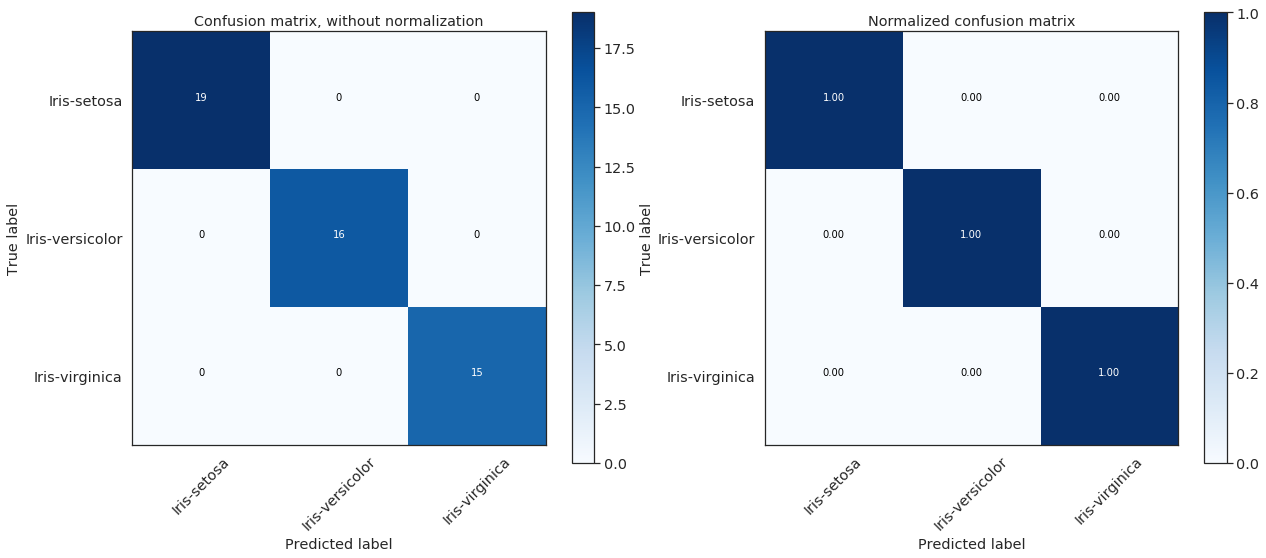

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("SVM")
model = model
model.fit(X_train, y_train)
print_performance(model, X_test, y_test, class_names)